In [1]:
from environment import Environment
from agent import Agent
from trainer import Q_learning_trainer, One_step_variational_trainer, Final_variational_trainer, KL_Q_learning_trainer
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Hyperparameters

In [3]:
N = 100000 # Number of episodes
side = 10

In [4]:
# Agent/Environment initialization

In [5]:
env = Environment.square(initial_state_range=1, side = side)

#agent = Agent(GAMMA = 1)
BETA = 15
ALPHA_REF = 3e-3
OBS_LEAK = 1e-2 / env.N_obs

agent = Agent(env, GAMMA=1, ALPHA=ALPHA_REF / BETA, BETA=BETA, do_reward = True)
trainer = Final_variational_trainer(agent, OBS_LEAK=OBS_LEAK, final = True, monte_carlo = True)


#agent = Agent(env, GAMMA=1, ALPHA=0.1, BETA=15, do_reward = True)


#trainer = Q_learning_trainer(agent, OBS_LEAK=OBS_LEAK, monte_carlo = True)
#trainer = KL_Q_learning_trainer(agent, OBS_LEAK=OBS_LEAK, monte_carlo = True, final = True)
#trainer = one_step_variational_trainer(agent)


{0: {'S': 10, 'E': 1}, 1: {'W': 0, 'S': 11, 'E': 2}, 2: {'W': 1, 'S': 12, 'E': 3}, 3: {'W': 2, 'S': 13, 'E': 4}, 4: {'W': 3, 'S': 14, 'E': 5}, 5: {'W': 4, 'S': 15, 'E': 6}, 6: {'W': 5, 'S': 16, 'E': 7}, 7: {'W': 6, 'S': 17, 'E': 8}, 8: {'W': 7, 'S': 18, 'E': 9}, 9: {'W': 8, 'S': 19}, 10: {'S': 20, 'N': 0, 'E': 11}, 11: {'W': 10, 'S': 21, 'N': 1, 'E': 12}, 12: {'W': 11, 'S': 22, 'N': 2, 'E': 13}, 13: {'W': 12, 'S': 23, 'N': 3, 'E': 14}, 14: {'W': 13, 'S': 24, 'N': 4, 'E': 15}, 15: {'W': 14, 'S': 25, 'N': 5, 'E': 16}, 16: {'W': 15, 'S': 26, 'N': 6, 'E': 17}, 17: {'W': 16, 'S': 27, 'N': 7, 'E': 18}, 18: {'W': 17, 'S': 28, 'N': 8, 'E': 19}, 19: {'W': 18, 'S': 29, 'N': 9}, 20: {'S': 30, 'N': 10, 'E': 21}, 21: {'W': 20, 'S': 31, 'N': 11, 'E': 22}, 22: {'W': 21, 'S': 32, 'N': 12, 'E': 23}, 23: {'W': 22, 'S': 33, 'N': 13, 'E': 24}, 24: {'W': 23, 'S': 34, 'N': 14, 'E': 25}, 25: {'W': 24, 'S': 35, 'N': 15, 'E': 26}, 26: {'W': 25, 'S': 36, 'N': 16, 'E': 27}, 27: {'W': 26, 'S': 37, 'N': 17, 'E': 2

In [6]:
if True:
    mem_pi = []
    mem_KL = []
    mem_TD = []
for i in range(N):
    trainer.run_episode()
    past_obs = trainer.trajectory[-2]
    past_action = trainer.action_history[-1]
    obs = trainer.trajectory[-1]
    reward = trainer.reward_history[-1]
    mem_pi += [trainer.agent.softmax(past_obs)[past_action]]
    mem_KL += [trainer.KL(past_obs,past_action,obs,done=True)]
    mem_TD += [trainer.TD_err_var(past_obs,past_action,obs,reward,done=True)]
    if i%1000 ==0:
        #plt.figure(figsize = (4, 4))
        #plt.plot(agent.KL.flatten())
        print(trainer.nb_trials)
        print("Trajectory: ", trainer.trajectory)
        print("past_obs :", past_obs, ", final Q:", trainer.agent.Q_var[past_obs])
        print("final policy :", trainer.agent.softmax(past_obs))
        print("Final reward: ", reward)
        print("final KL :", trainer.KL(past_obs,past_action,obs,done=True))
        print("final TD error :", trainer.TD_err_var(past_obs,past_action,obs,reward,done=True))

1
Trajectory:  [1, 1, 2, 1, 2, 3, 2, 1, 2, 3, 4, 14, 15, 25, 26, 16, 26, 16, 26]
past_obs : 16 , final Q: [ 0.         -0.00997647  0.          0.        ]
final policy : [ 0.25899946  0.22300161  0.25899946  0.25899946]
Final reward:  0
final KL : 2.19722457734
final TD error : 0.0099764658403
1001
Trajectory:  [0, 0, 1, 11, 21, 31, 41, 40, 50, 60, 70, 70, 70, 71, 70, 70, 71, 70, 60]
past_obs : 70 , final Q: [ 0.02277202  0.02251605  0.00716116  0.00190107]
final policy : [ 0.28420363  0.28311454  0.22487129  0.20781054]
Final reward:  0
final KL : 0.605480553202
final TD error : -0.00190107245458
2001
Trajectory:  [1, 2, 2, 3, 4, 14, 24, 25, 35, 45, 35, 36, 46, 36, 26, 36, 26, 27, 37]
past_obs : 27 , final Q: [ 0.0466957   0.0734845   0.00349438  0.00108608]
final policy : [ 0.2839165   0.42433028  0.14851118  0.14324204]
Final reward:  0
final KL : 0.487585081365
final TD error : -0.0734844987605
3001
Trajectory:  [0, 10, 20, 30, 40, 30, 40, 50, 40, 50, 50, 51, 52, 62, 63, 64, 65, 7

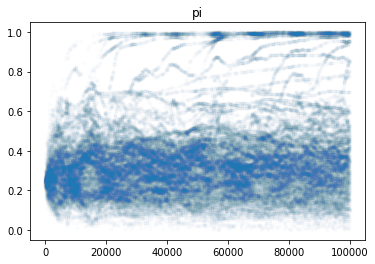

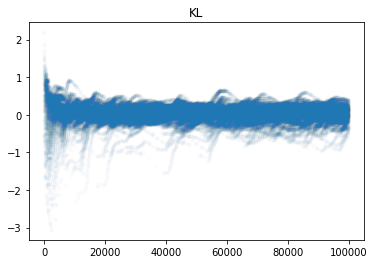

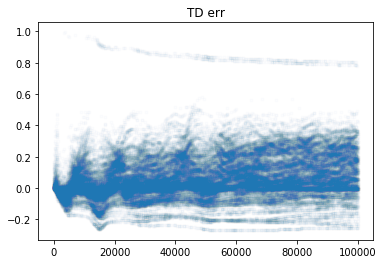

In [7]:
plt.plot(mem_pi,'.', alpha = 0.01)
plt.title('pi')
plt.show()
plt.plot(mem_KL,'.', alpha = 0.01)
plt.title('KL')
plt.show()
plt.plot(mem_TD,'.', alpha = 0.01)
plt.title('TD err')
plt.show()


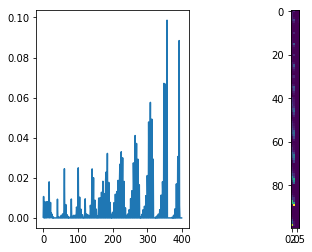

In [8]:
plt.subplot(1,2,1)
plt.plot(agent.Q_ref.flatten())
plt.subplot(1,2,2)
plt.imshow(agent.Q_ref)
plt.show()

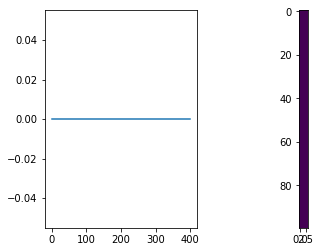

In [9]:
#print('KL', agent.KL)
plt.subplot(1,2,1)
plt.plot(agent.KL.flatten())
plt.subplot(1,2,2)
plt.imshow(agent.KL)
plt.show()

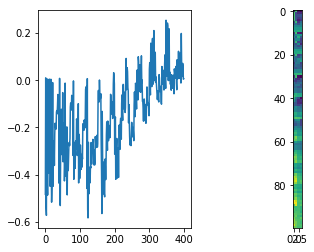

In [10]:
plt.subplot(1,2,1)
plt.plot(agent.Q_var.flatten())
plt.subplot(1,2,2)
plt.imshow(agent.Q_var)
plt.show()

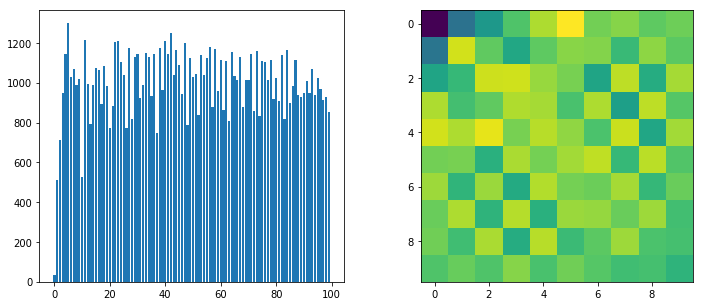

In [11]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.nb_visits_final)
plt.subplot(1,2,2)
plt.imshow(trainer.nb_visits_final.reshape(side,side))
plt.show()

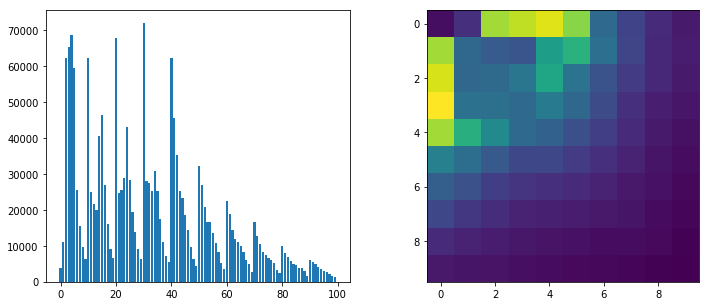

In [12]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.nb_visits)
plt.subplot(1,2,2)
plt.imshow(trainer.nb_visits.reshape(side,side))
plt.show()

[  2.27917134e-03   6.18286877e+01   9.05649102e+01   1.02943213e+02
   1.05558626e+02   1.30229419e+02   1.02098233e+02   9.38971084e+01
   9.93905275e+01   9.38233931e+01   6.59033982e+01   1.50264037e+02
   9.64521303e+01   8.53336830e+01   1.22277203e+02   1.47770564e+02
   1.00028267e+02   7.76023810e+01   1.04874677e+02   9.00085345e+01
   7.36751128e+01   8.58330070e+01   1.29554682e+02   1.15691049e+02
   9.24035923e+01   8.31737329e+01   5.34818826e+01   1.17011187e+02
   8.20367484e+01   1.12850658e+02   1.05987986e+02   8.30506436e+01
   8.74272649e+01   1.42693330e+02   1.11401457e+02   8.53990198e+01
   1.08380516e+02   7.32705398e+01   1.12135885e+02   9.62323152e+01
   1.12474893e+02   1.46696934e+02   1.40878013e+02   1.17501949e+02
   1.25871982e+02   1.12667297e+02   9.87610244e+01   1.32752478e+02
   8.60465850e+01   1.16698157e+02   1.29645095e+02   8.97729526e+01
   8.15280722e+01   1.12991069e+02   1.08817063e+02   1.10294357e+02
   1.32634625e+02   8.14302558e+01

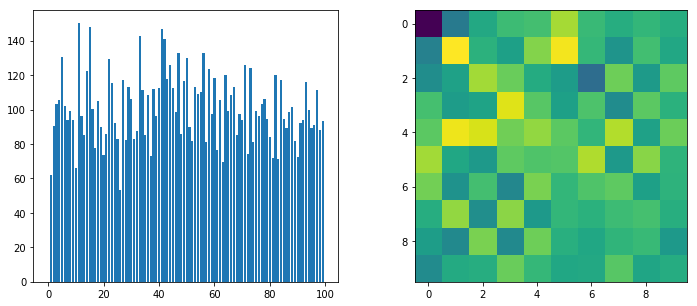

In [13]:
print(trainer.obs_score_final)
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.obs_score_final)
plt.subplot(1,2,2)
plt.imshow(trainer.obs_score_final.reshape(side,side))
plt.show()

[  6.27822011e-02   5.89968842e+01   3.51426781e+02   3.49861346e+02
   3.37840606e+02   3.40653083e+02   3.30836045e+01   2.31457805e+01
   1.39074356e+01   1.08484127e+01   3.39453033e+02   1.72585457e+02
   1.69298299e+02   2.80277749e+02   3.00718630e+02   3.32746423e+02
   4.39693402e+01   2.75103389e+01   1.55164939e+01   6.42085159e+00
   3.32906281e+02   7.93817358e+01   9.79520577e+01   3.46475387e+02
   3.38376356e+02   6.99006877e+01   3.93182413e+01   3.23601611e+01
   1.91854112e+01   5.21642772e+00   3.26845392e+02   5.07084228e+01
   1.00547572e+02   1.86599773e+02   2.64563888e+02   1.21386722e+02
   5.17359404e+01   2.98187925e+01   1.57232857e+01   8.34526585e+00
   3.17242900e+02   3.21462898e+02   3.29708943e+02   2.36797452e+02
   2.08893879e+02   1.23686572e+02   7.14496124e+01   4.31194735e+01
   1.92332700e+01   1.02923228e+01   1.87269164e+02   1.26922320e+02
   1.82228107e+02   1.36692737e+02   1.42386361e+02   7.09706431e+01
   4.72916797e+01   3.08543516e+01

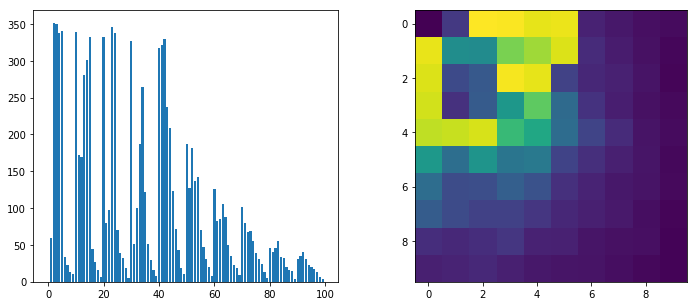

In [14]:
print(trainer.obs_score)
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.obs_score)
plt.subplot(1,2,2)
plt.imshow(trainer.obs_score.reshape(side,side))
plt.show()

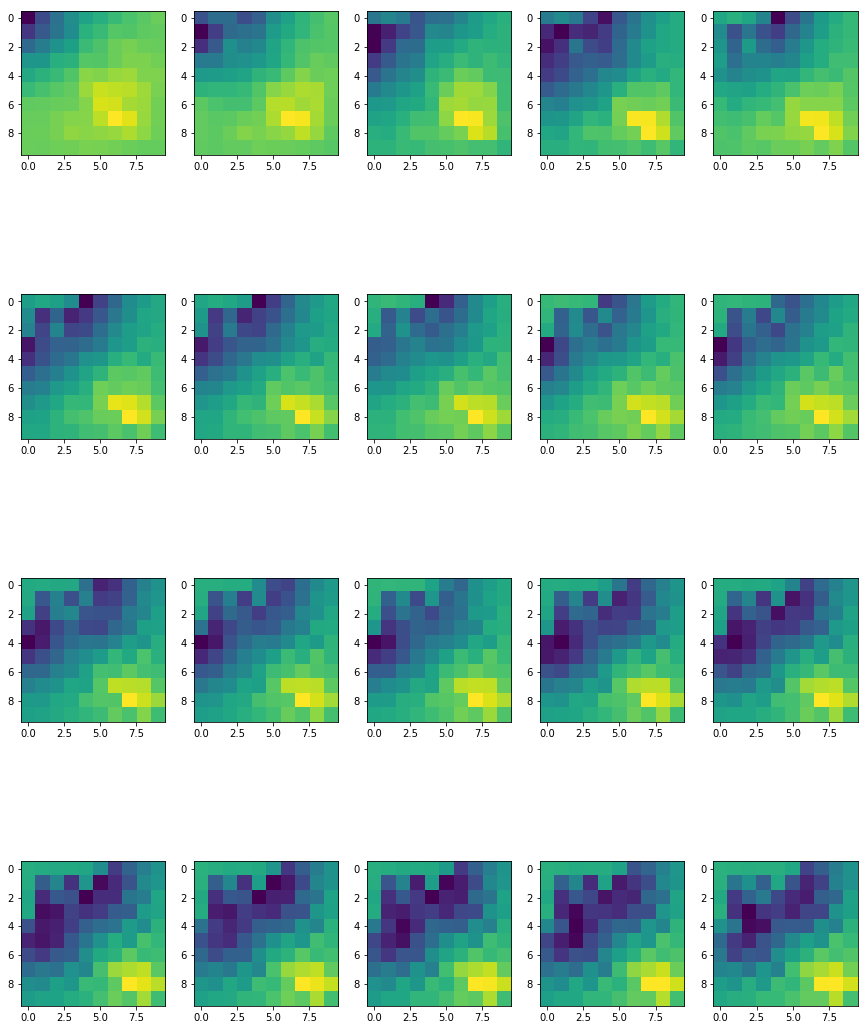

In [15]:
plt.figure(figsize=(15,20))
for i in range(1, 21):
    plt.subplot(4,5,i)
    plt.imshow(trainer.mem_V[i * N//20].reshape(side,side))
plt.show()